In [1]:
from photometry_analysis import *

Analyzing session JOA-M-0026/20250203...
Loaded saved results for JOA-M-0026/20250203
Saved figure for JOA-M-0026/20250203 to Z:\delab\lab-members\joschua\photometry_analysis\JOA-M-0026\20250203\session_results_heatmap_winloss.png


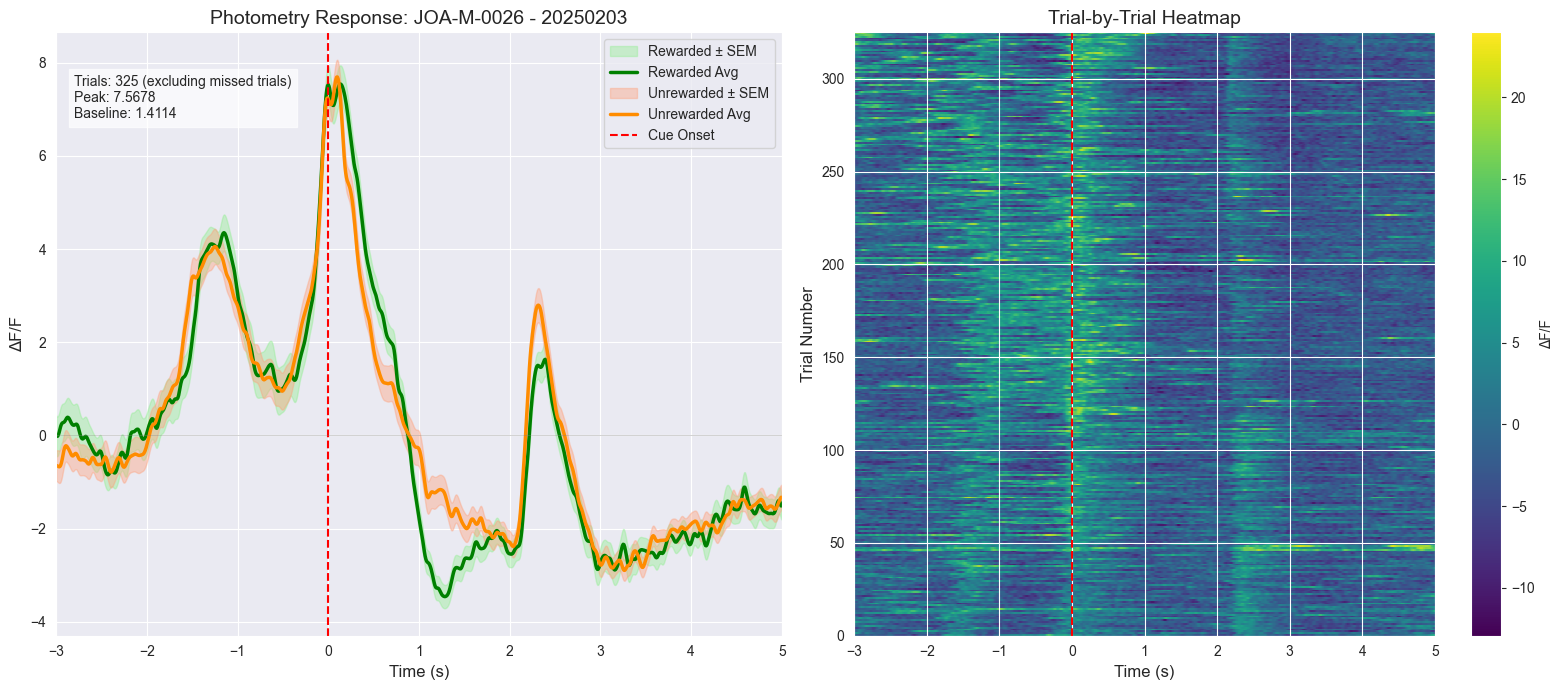

In [2]:
# Analyze a specific subject and session
session_result = analyze_specific_session("JOA-M-0026", "20250203", show_heatmap=True, win_loss=True)

In [ ]:
# Analyze all sessions for a specific subject and create pooled visualization
subject_pooled_result = pooled_results("JOA-M-0022", win_loss=True)

In [ ]:
# Process all subjects and sessions
results, subject_list = all_results(win_loss=True)

Available subjects:
1. JOA-M-0022
2. JOA-M-0023
3. JOA-M-0024
4. JOA-M-0025
5. JOA-M-0026

Available sessions for JOA-M-0026:
1. 20250131
2. 20250201
3. 20250203
4. 20250205
5. 20250206
6. 20250207
7. 20250210
8. 20250211
9. 20250212
10. 20250215
11. [POOLED] All sessions

Analyzing session JOA-M-0026/20250203...
Loaded saved results for JOA-M-0026/20250203
Saved figure for JOA-M-0026/20250203 to Z:\delab\lab-members\joschua\photometry_analysis\JOA-M-0026\20250203\session_results_winloss.png


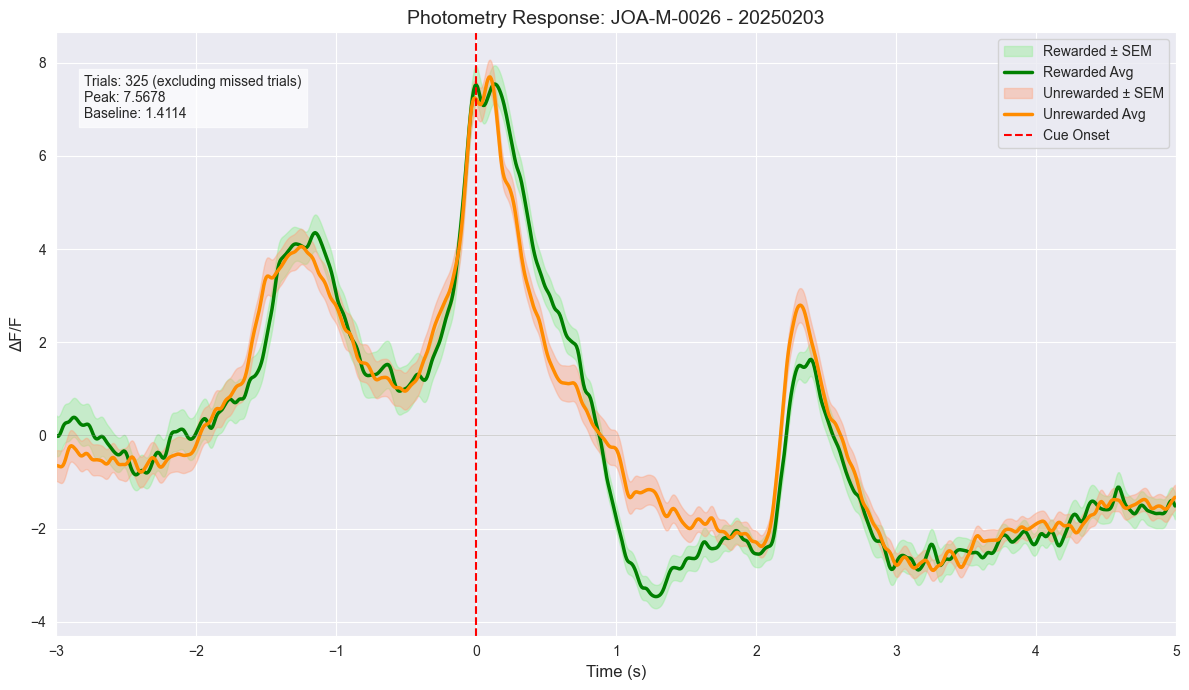

In [8]:
select_and_visualize(show_heatmap=False, win_loss=True)